In [232]:
"""COVID
# Read in the covid deaths data set
* create deathsbyzip dataframe
* add mortality rate for later comparison with vaccination rates
"""

'COVID\n# Read in the covid deaths data set\n* create deathsbyzip dataframe\n* add mortality rate for later comparison with vaccination rates\n'

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
df=pd.read_csv('COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code.csv')
deathsbyzip=pd.DataFrame(df.groupby(['ZIP Code'])[['Deaths - Cumulative', 'Population']].max())
deathsbyzip.columns = ['Deaths - Cumulative', 'Population']
deathsbyzip['Covid Mortality Rate'] = deathsbyzip['Deaths - Cumulative']/ deathsbyzip['Population']
deathsbyzip

,Deaths - Cumulative,Population,Covid Mortality Rate
ZIP Code,,,
60601,13,14675,0.000886
60602,3,1244,0.002412
60603,0,1174,0.000000
60604,0,782,0.000000
60605,15,27519,0.000545
60606,9,3101,0.002902
60607,18,29591,0.000608
60608,200,79205,0.002525
60609,226,61495,0.003675


In [234]:
"""# Read in Vaccinations data
* inspect data
* calculate vaccine rate by zip
* merge with deathsbyzip
* create scatter plot and calculate correlation coefficient
* clean up outliers and bad data
* recreate scatter plot and recalculate correlation coefficient
* Appears to be some minor correlation for these zip codes where higher vaccine rates mildly correlate to mortality rates from covid
"""

'# Read in Vaccinations data\n* inspect data\n* calculate vaccine rate by zip\n* merge with deathsbyzip\n* create scatter plot and calculate correlation coefficient\n* clean up outliers and bad data\n* recreate scatter plot and recalculate correlation coefficient\n* Appears to be some minor correlation for these zip codes where higher vaccine rates mildly correlate to mortality rates from covid\n'

In [235]:
%matplotlib inline

In [236]:
dfv = pd.read_csv('COVID-19_Vaccinations_by_ZIP_Code.csv')

In [237]:
dfv.columns

Index(['Zip Code', 'Date', 'Total Doses - Daily', 'Total Doses - Cumulative',
       '1st Dose - Daily', '1st Dose - Cumulative',
       '1st Dose - Percent Population', 'Vaccine Series Completed - Daily',
       'Vaccine Series Completed - Cumulative',
       'Vaccine Series Completed  - Percent Population',
       'Total Doses - Daily - Age 5+', 'Total Doses - Daily - Age 12+',
       'Total Doses - Daily - Age 18+', 'Total Doses - Daily - Age 65+',
       '1st Dose - Daily - Age 5+', '1st Dose - Daily - Age 12+',
       '1st Dose - Daily - Age 18+', '1st Dose - Daily - Age 65+',
       'Vaccine Series Completed - Daily - Age 5+',
       'Vaccine Series Completed - Daily - Age 12+',
       'Vaccine Series Completed - Daily - Age 18+',
       'Vaccine Series Completed - Daily - Age 65+', 'Population',
       'ZIP Code Location', 'Row_ID'],
      dtype='object')

In [238]:
dfv.head()

,Zip Code,Date,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,Vaccine Series Completed - Daily,Vaccine Series Completed - Cumulative,Vaccine Series Completed - Percent Population,...,1st Dose - Daily - Age 12+,1st Dose - Daily - Age 18+,1st Dose - Daily - Age 65+,Vaccine Series Completed - Daily - Age 5+,Vaccine Series Completed - Daily - Age 12+,Vaccine Series Completed - Daily - Age 18+,Vaccine Series Completed - Daily - Age 65+,Population,ZIP Code Location,Row_ID
0,60603,12/15/2020,0,0,0,0,0.000,0,0,0.000,...,0,0,0,0,0,0,0,1052.0,POINT (-87.625473 41.880112),60603-20201215
1,60603,12/16/2020,0,0,0,0,0.000,0,0,0.000,...,0,0,0,0,0,0,0,1052.0,POINT (-87.625473 41.880112),60603-20201216
2,60601,03/20/2021,72,6196,56,3880,0.257,24,2379,0.158,...,56,56,4,24,24,24,6,15083.0,POINT (-87.622844 41.886262),60601-20210320
3,60601,03/21/2021,63,6259,56,3936,0.261,11,2390,0.158,...,56,56,1,11,11,11,2,15083.0,POINT (-87.622844 41.886262),60601-20210321
4,60601,03/23/2021,165,6540,148,4179,0.277,20,2434,0.161,...,148,148,4,20,20,20,5,15083.0,POINT (-87.622844 41.886262),60601-20210323


In [239]:
dfv[dfv['Zip Code']=='60602']

,Zip Code,Date,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,Vaccine Series Completed - Daily,Vaccine Series Completed - Cumulative,Vaccine Series Completed - Percent Population,...,1st Dose - Daily - Age 12+,1st Dose - Daily - Age 18+,1st Dose - Daily - Age 65+,Vaccine Series Completed - Daily - Age 5+,Vaccine Series Completed - Daily - Age 12+,Vaccine Series Completed - Daily - Age 18+,Vaccine Series Completed - Daily - Age 65+,Population,ZIP Code Location,Row_ID
324,60602,02/26/2021,17,574,4,349,0.305,14,224,0.196,...,4,4,2,14,14,14,12,1145.0,POINT (-87.628309 41.883136),60602-20210226
325,60602,02/27/2021,16,590,10,359,0.314,6,230,0.201,...,10,10,0,6,6,6,3,1145.0,POINT (-87.628309 41.883136),60602-20210227
326,60602,02/28/2021,2,592,1,360,0.314,1,231,0.202,...,1,1,0,1,1,1,1,1145.0,POINT (-87.628309 41.883136),60602-20210228
327,60602,03/01/2021,12,604,6,366,0.320,6,237,0.207,...,6,6,1,6,6,6,4,1145.0,POINT (-87.628309 41.883136),60602-20210301
328,60602,03/02/2021,14,618,5,371,0.324,9,246,0.215,...,5,5,0,9,9,9,6,1145.0,POINT (-87.628309 41.883136),60602-20210302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43399,60602,03/30/2021,19,971,14,606,0.529,5,381,0.333,...,14,14,0,5,5,5,0,1145.0,POINT (-87.628309 41.883136),60602-20210330
43400,60602,03/31/2021,19,990,12,618,0.540,8,389,0.340,...,12,12,0,8,8,8,1,1145.0,POINT (-87.628309 41.883136),60602-20210331
43401,60602,04/01/2021,35,1025,26,644,0.562,9,398,0.348,...,26,26,0,9,9,9,0,1145.0,POINT (-87.628309 41.883136),60602-20210401
43402,60602,04/02/2021,28,1053,16,660,0.576,12,410,0.358,...,16,16,0,12,12,12,0,1145.0,POINT (-87.628309 41.883136),60602-20210402


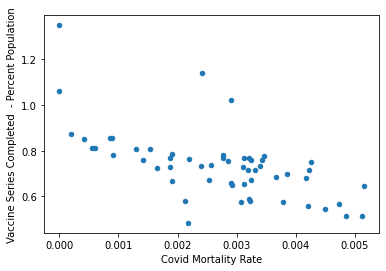

In [240]:
vaccinesbyzip=pd.DataFrame(dfv.groupby(['Zip Code'])['Vaccine Series Completed  - Percent Population'].max())
report = deathsbyzip.merge(vaccinesbyzip, left_index=True, right_index=True)
report[[ 'Covid Mortality Rate',
       'Vaccine Series Completed  - Percent Population']].plot.scatter(x= 'Covid Mortality Rate', y=  'Vaccine Series Completed  - Percent Population')

In [241]:
report[[ 'Covid Mortality Rate',
       'Vaccine Series Completed  - Percent Population']].corr()

,Covid Mortality Rate,Vaccine Series Completed - Percent Population
Covid Mortality Rate,1.000000,-0.624661
Vaccine Series Completed - Percent Population,-0.624661,1.000000


In [242]:
report.describe()

,Deaths - Cumulative,Population,Covid Mortality Rate,Vaccine Series Completed - Percent Population
count,60.000000,60.000000,59.000000,58.000000
mean,132.666667,46230.216667,inf,0.711345
std,97.971401,27076.685907,NaN,0.201246
min,0.000000,0.000000,0.000000,0.000000
25%,49.000000,28747.250000,0.001760,0.649000
50%,122.000000,44965.500000,0.002901,0.729500
75%,202.000000,67067.000000,0.003418,0.779500
max,349.000000,111850.000000,inf,1.350000


In [243]:
report  = report[report['Covid Mortality Rate'].isnull()==False]
report = report[report.index!='Unknown']
report = report[report['Vaccine Series Completed  - Percent Population']<=1]
report


,Deaths - Cumulative,Population,Covid Mortality Rate,Vaccine Series Completed - Percent Population
ZIP Code,,,,
60601,13,14675,0.000886,0.856
60605,15,27519,0.000545,0.813
60607,18,29591,0.000608,0.813
60608,200,79205,0.002525,0.672
60609,226,61495,0.003675,0.686
60610,55,39019,0.001410,0.758
60611,28,32426,0.000864,0.857
60612,107,34311,0.003119,0.652
60613,65,50113,0.001297,0.807


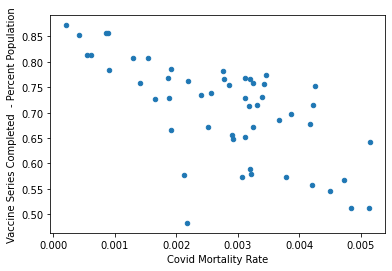

In [244]:
report[[ 'Covid Mortality Rate',
       'Vaccine Series Completed  - Percent Population']].plot.scatter(x= 'Covid Mortality Rate', y=  'Vaccine Series Completed  - Percent Population')

In [245]:
report[[ 'Covid Mortality Rate',
       'Vaccine Series Completed  - Percent Population']].corr()

,Covid Mortality Rate,Vaccine Series Completed - Percent Population
Covid Mortality Rate,1.00000,-0.66349
Vaccine Series Completed - Percent Population,-0.66349,1.00000


,Covid Mortality Rate,Vaccine Series Completed - Percent Population
Covid Mortality Rate,1.00000,-0.66349
Vaccine Series Completed - Percent Population,-0.66349,1.00000


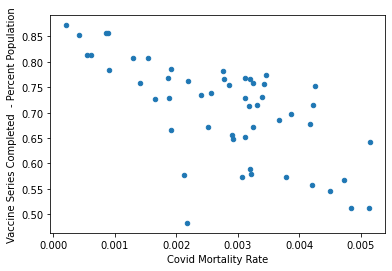

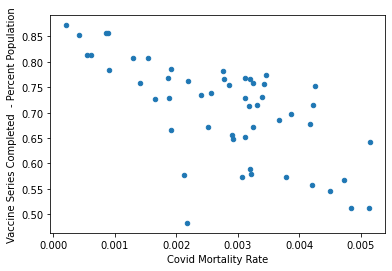

In [246]:
report[[ 'Covid Mortality Rate',
       'Vaccine Series Completed  - Percent Population']].plot.scatter(x= 'Covid Mortality Rate', y=  'Vaccine Series Completed  - Percent Population')

report[[ 'Covid Mortality Rate',
       'Vaccine Series Completed  - Percent Population']].corr()

report.describe()

report = report[report['Covid Mortality Rate'].isnull()==False]
report = report[report.index!='Unknown']
report = report[report['Vaccine Series Completed  - Percent Population']<=1]
report

report[[ 'Covid Mortality Rate',
       'Vaccine Series Completed  - Percent Population']].plot.scatter(x= 'Covid Mortality Rate', y=  'Vaccine Series Completed  - Percent Population')

report[[ 'Covid Mortality Rate',
       'Vaccine Series Completed  - Percent Population']].corr()

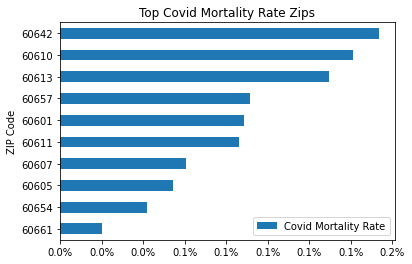

In [247]:
#Top zipccoes wiht the highest mortality rates
top_10_zips = report.sort_values('Covid Mortality Rate', ascending=True).head(10)[['Covid Mortality Rate']]

ax = top_10_zips.plot.barh(title = 'Top Covid Mortality Rate Zips', y= 'Covid Mortality Rate')

ax = ax.set_xticklabels(map('{:.1f}%'.format, 100*ax.xaxis.get_majorticklocs()))

#In 2020, the median household income of 60642 households was $120,442. 60642 households made slightly more than 60126 households ($120,438) and 62625 households ($120,156) . However, 0.0% of 60642 families live in poverty.
#Covid mortality has no correlation with poverty levels given zipcode 60642 has a 0% poverty rate. 


In [248]:
'''''''''I calculated the covid mortality rate and compared it to the vaccine rate by zip code and found that their is weak to moderate correlation where mortality decreases as vaccine rates increase'''

'I calculated the covid mortality rate and compared it to the vaccine rate by zip code and found that their is weak to moderate correlation where mortality decreases as vaccine rates increase'